In [85]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [86]:
pro_frames_merge = pd.read_csv('pro_frames_merge_2v2.csv', index_col = 0)
tech_looper = pro_frames_merge['technique_looper'].astype('str') 
tech_pen = pro_frames_merge['technique_penetrator'].astype('str')
pro_frames_merge['tech_combo'] = tech_looper + tech_pen

In [87]:
overlap_frames = pro_frames_merge[pro_frames_merge['frame_from_overlap'] == 0]
type_stats = overlap_frames.groupby('stunt_type')['frame_from_snap'].describe()
type_stats['wins']= overlap_frames.groupby('stunt_type')['rush_win'].sum()
type_stats['win_rate'] = type_stats['wins'] / type_stats['count']
type_stats

,count,mean,std,min,25%,50%,75%,max,wins,win_rate
stunt_type,,,,,,,,,,
EE,1.0,23.000000,NaN,23.0,23.0,23.0,23.0,23.0,0.0,0.000000
ET,286.0,18.213287,2.395895,11.0,17.0,18.0,20.0,23.0,91.0,0.318182
TE,198.0,17.388889,3.052049,10.0,15.0,17.0,20.0,23.0,75.0,0.378788
TT,441.0,16.850340,3.316667,3.0,15.0,17.0,19.0,23.0,134.0,0.303855


In [88]:
type_by_combo = overlap_frames.groupby(['stunt_type','position_combo'])['gameId'].count().rename('count').to_frame()
type_by_combo['wins'] = overlap_frames.groupby(['stunt_type','position_combo'])['rush_win'].sum()
type_by_combo['win_rate'] = type_by_combo['wins'] / type_by_combo['count']
type_by_combo

count   wins  win_rate
stunt_type position_combo                        
EE         TG                  1    0.0  0.000000
ET         GC                  7    3.0  0.428571
           TC                 17    3.0  0.176471
           TET                 1    0.0  0.000000
           TG                260   85.0  0.326923
           WRT                 1    0.0  0.000000
TE         GC                 13    4.0  0.307692
           GG                  1    0.0  0.000000
           TC                  5    0.0  0.000000
           TG                178   71.0  0.398876
           WRT                 1    0.0  0.000000
TT         CG                  2    0.0  0.000000
           GC                389  125.0  0.321337
           GG                 14    1.0  0.071429
           GHB                 1    0.0  0.000000
           HBC                10    1.0  0.100000
           HBG                 5    1.0  0.200000
           TC                  6    2.0  0.333333
           TG                 14    4.0  0.285714

In [89]:
pen_techs = overlap_frames.groupby(['stunt_type', 'technique_penetrator'])['gameId'].count().rename('count').to_frame()
pen_techs['wins'] = overlap_frames.groupby(['stunt_type', 'technique_penetrator'])['rush_win'].sum()
pen_techs['win_rate'] = pen_techs['wins'] / pen_techs['count']
for role in ('penetrator', 'looper'):
    for result in ('hurry', 'hit', 'sack'):
        pen_techs['_'.join((role,result))] = overlap_frames.groupby(['stunt_type', 'technique_penetrator'])['_'.join(('pff',
                                                                                                                     result,
                                                                                                                     role))].sum()

    role_cols = [col for col in pen_techs if role in col]
    pen_techs[role+'_win'] = pen_techs[role_cols].agg(np.sum, axis = 1)
pen_techs

count  wins  win_rate  penetrator_hurry  \
stunt_type technique_penetrator                                            
EE         5                         1   0.0  0.000000               0.0   
ET         5                       258  81.0  0.313953              26.0   
           6                         4   1.0  0.250000               1.0   
           7                        24   9.0  0.375000               5.0   
TE         0                         3   0.0  0.000000               0.0   
           1                         7   1.0  0.142857               0.0   
           2                        22   7.0  0.318182               2.0   
           3                        36  13.0  0.361111               1.0   
           4                       124  52.0  0.419355              13.0   
           5                         4   1.0  0.250000               1.0   
           7                         2   1.0  0.500000               0.0   
TT         0                        39  16.0  0.410256               6.0   
           1                        66  17.0  0.257576               4.0   
           2                       102  28.0  0.274510               9.0   
           3                        62  20.0  0.322581               2.0   
           4                       153  47.0  0.307190              14.0   
           5                        15   4.0  0.266667               1.0   
           7                         4   2.0  0.500000               1.0   

                                 penetrator_hit  penetrator_sack  \
stunt_type technique_penetrator                                    
EE         5                                0.0              0.0   
ET         5                                9.0              0.0   
           6                                0.0              0.0   
           7                                0.0              0.0   
TE         0                                0.0              0.0   
           1                                0.0              0.0   
           2                                0.0              0.0   
           3                                2.0              0.0   
           4                                3.0              0.0   
           5                                0.0              0.0   
           7                                0.0              0.0   
TT         0                                1.0              0.0   
           1                                1.0              0.0   
           2                                3.0              0.0   
           3                                4.0              0.0   
           4                               11.0              0.0   
           5                                0.0              0.0   
           7                                0.0              0.0   

                                 penetrator_win  looper_hurry  looper_hit  \
stunt_type technique_penetrator                                             
EE         5                                0.0           0.0         0.0   
ET         5                               35.0          26.0        10.0   
           6                                1.0           0.0         0.0   
           7                                5.0           5.0         0.0   
TE         0                                0.0           0.0         0.0   
           1                                0.0           2.0         0.0   
           2                                2.0           4.0         1.0   
           3                                3.0           4.0         2.0   
           4                               16.0          21.0         5.0   
           5                                1.0           0.0         1.0   
           7                                0.0           0.0         0.0   
TT         0                                7.0           3.0         2.0   
           1                                5.0           4.0         1.0

In [90]:
winners_by_type = pen_techs.reset_index().groupby('stunt_type').sum()
winners_by_type.drop(['technique_penetrator', 'win_rate'], axis = 1, inplace = True)
winners_by_type 

,count,wins,penetrator_hurry,penetrator_hit,penetrator_sack,penetrator_win,looper_hurry,looper_hit,looper_sack,looper_win
stunt_type,,,,,,,,,,
EE,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ET,286,91.0,32.0,9.0,0.0,41.0,31.0,10.0,0.0,41.0
TE,198,75.0,17.0,5.0,0.0,22.0,31.0,9.0,0.0,40.0
TT,441,134.0,37.0,20.0,0.0,57.0,46.0,10.0,0.0,56.0


In [91]:
not_ol = ['HB', 'WR', 'FB', 'TE']
pro_frames_merge = pro_frames_merge[(~pro_frames_merge['position_in'].isin(not_ol)) &
                                    (~pro_frames_merge['position_out'].isin(not_ol))]

In [92]:
overlap_frames = pro_frames_merge[pro_frames_merge['frame_from_overlap'] == 0]
wins0 = overlap_frames[overlap_frames['rush_win'] == 1]
losses0 = overlap_frames[overlap_frames['rush_win'] == 0]
overlap_frames['frame_from_snap'].describe(), wins0['frame_from_snap'].describe(), losses0['frame_from_snap'].describe()

(count    907.000000
 mean      17.406836
 std        3.061344
 min        3.000000
 25%       15.000000
 50%       17.000000
 75%       20.000000
 max       23.000000
 Name: frame_from_snap, dtype: float64,
 count    298.000000
 mean      17.476510
 std        2.945256
 min        9.000000
 25%       16.000000
 50%       18.000000
 75%       19.000000
 max       23.000000
 Name: frame_from_snap, dtype: float64,
 count    609.000000
 mean      17.372742
 std        3.118384
 min        3.000000
 25%       15.000000
 50%       17.000000
 75%       20.000000
 max       23.000000
 Name: frame_from_snap, dtype: float64)

(array([  2.,   0.,   0.,   6.,  20.,  82., 128., 148., 114., 109.]),
 array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.]),
 <BarContainer object of 10 artists>)

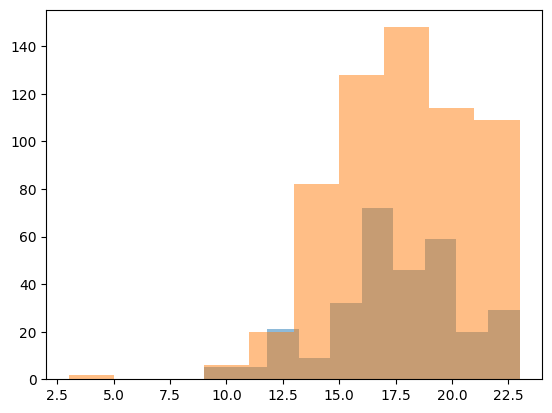

In [93]:
plt.hist(wins0['frame_from_snap'], alpha = 0.5)
plt.hist(losses0['frame_from_snap'], alpha = 0.5)

Winning and losing reps declare at roughly the same time after the snap. We'll proceed with centering the reps around the overlap frame.

In [94]:
var = 'penetrator_depth'
wins0.groupby('stunt_type')[var].describe(), losses0.groupby('stunt_type')[var].describe()

(            count      mean       std   min    25%    50%    75%   max
 stunt_type                                                            
 ET           91.0  3.917143  1.107439  1.55  2.985  3.990  4.720  6.42
 TE           75.0  4.300533  1.296182  1.33  3.480  4.430  5.170  6.98
 TT          132.0  3.449470  1.149649  0.43  2.710  3.315  4.165  6.78,
             count      mean       std   min    25%   50%     75%   max
 stunt_type                                                            
 EE            1.0  5.820000       NaN  5.82  5.820  5.82  5.8200  5.82
 ET          193.0  3.380518  0.895044  1.22  2.740  3.39  3.9100  5.66
 TE          122.0  3.751230  1.200705  0.92  2.965  3.66  4.7875  6.44
 TT          293.0  3.020307  1.019757 -1.07  2.410  3.00  3.6300  6.15)

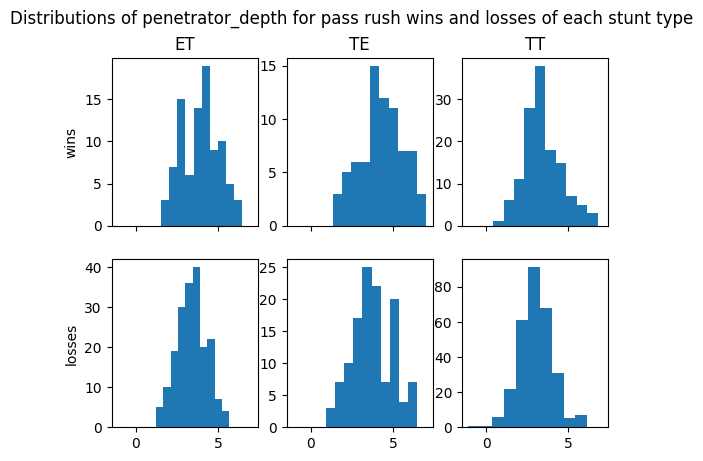

In [95]:
def hist_plots(var):  
    fig, axs = plt.subplots(2,3, sharex = True)
    title = 'Distributions of {} for pass rush wins and losses of each stunt type'.format(var)
    plt.suptitle(title)
    i,j = 0,0
    labels = ['wins', 'losses']
    for df in (wins0, losses0):
        for stunt_type in ['ET','TE','TT']:
            ax = axs[i,j]
            ax.hist(df[df['stunt_type'] == stunt_type][var])
            if i == 0:
                ax.set_title(stunt_type)
            if j == 0:
                ax.set_ylabel(labels[i])
            j += 1
        j = 0
        i += 1
hist_plots(var)

For penetrator depth, distributions are nearly normal with roughly equal variance. Proceed with t-tests.

In [96]:
def t_tests(var):
    for stunt_type in ['ET','TE','TT']:
        print('Results for stunt type {} on variable {}:'.format(stunt_type, var))
        print(stats.ttest_ind(losses0[losses0['stunt_type'] == stunt_type][var], 
                              wins0[wins0['stunt_type'] == stunt_type][var]))
t_tests(var)

Results for stunt type ET on variable penetrator_depth:
Ttest_indResult(statistic=-4.359908592885025, pvalue=1.8255581715173495e-05)
Results for stunt type TE on variable penetrator_depth:
Ttest_indResult(statistic=-3.0243909422247954, pvalue=0.0028266920528616387)
Results for stunt type TT on variable penetrator_depth:
Ttest_indResult(statistic=-3.8561412152057177, pvalue=0.00013311097952439248)


Sample means of penetrator depth are significantly different across each stunt type.

In [97]:
var = 'y_diff'
wins0.groupby('stunt_type')[var].describe(), losses0.groupby('stunt_type')[var].describe()

(            count      mean       std   min   25%   50%    75%   max
 stunt_type                                                          
 ET           91.0  1.005495  0.634317 -0.39  0.61  1.04  1.340  2.59
 TE           75.0  0.240933  0.768189 -2.30 -0.04  0.40  0.730  2.41
 TT          132.0  0.217273  0.802627 -1.71 -0.31  0.17  0.635  3.54,
             count      mean       std   min     25%    50%   75%   max
 stunt_type                                                            
 EE            1.0 -0.650000       NaN -0.65 -0.6500 -0.650 -0.65 -0.65
 ET          193.0  0.566580  0.626031 -1.33  0.2600  0.460  0.86  2.51
 TE          122.0  0.168361  0.741726 -2.82 -0.0575  0.335  0.63  1.61
 TT          293.0  0.043345  0.665933 -2.23 -0.3600  0.010  0.50  2.74)

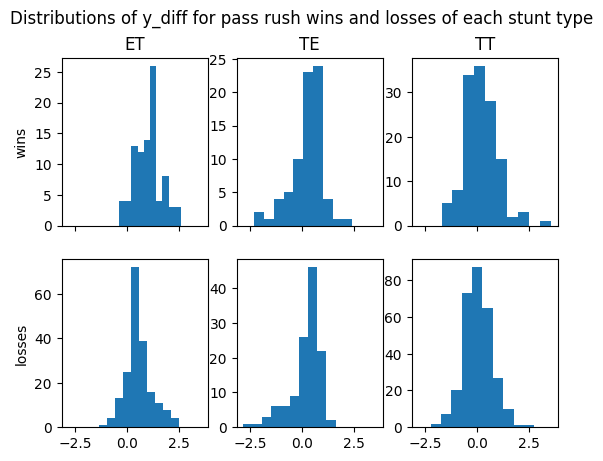

In [98]:
hist_plots(var)

In [99]:
t_tests(var)

Results for stunt type ET on variable y_diff:
Ttest_indResult(statistic=-5.490158087317193, pvalue=8.958283755063929e-08)
Results for stunt type TE on variable y_diff:
Ttest_indResult(statistic=-0.6578141258747765, pvalue=0.5114333606373491)
Results for stunt type TT on variable y_diff:
Ttest_indResult(statistic=-2.333335323262725, pvalue=0.020098372096931594)


Sample means of difference in depth are significantly different for 'ET' and 'TT' stunts, but not 'TE' stunts. 

In [100]:
var = 'mean_squareness'
wins0.groupby('stunt_type')[var].describe(), losses0.groupby('stunt_type')[var].describe()

(            count       mean        std    min      25%      50%      75%  \
 stunt_type                                                                  
 ET           91.0  43.941154  23.110628   0.48  29.5225  42.1700  54.1375   
 TE           75.0  47.131733  21.436805  14.04  31.2275  43.7700  62.3450   
 TT          132.0  39.569848  25.844814   4.64  20.6750  32.1125  53.9850   
 
                max  
 stunt_type          
 ET          147.66  
 TE           96.96  
 TT          124.97  ,
             count       mean        std     min     25%      50%       75%  \
 stunt_type                                                                   
 EE            1.0  46.970000        NaN  46.970  46.970  46.9700  46.97000   
 ET          193.0  31.658394  18.344232   0.165  18.865  29.2650  41.19000   
 TE          122.0  36.089836  18.883539   0.460  25.350  33.1875  45.38125   
 TT          293.0  31.678823  20.664292   1.745  16.450  27.2500  42.46500   
 
                 max 

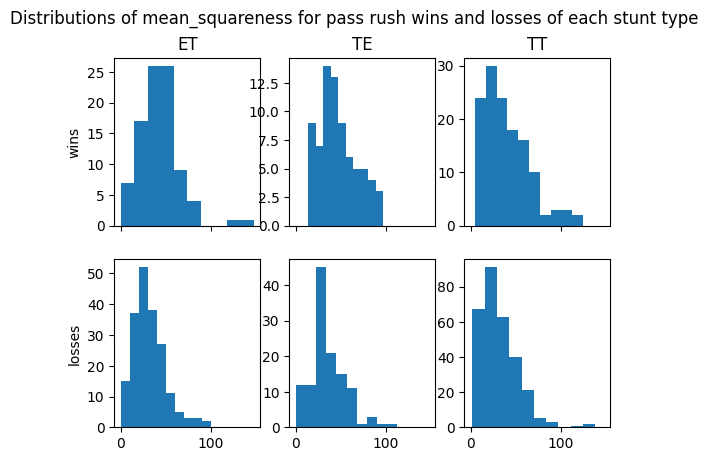

In [101]:
hist_plots(var)

Mean squareness more gamma-distributed

In [102]:
var = 'rotation_outside_in'
wins0.groupby('stunt_type')[var].describe(), losses0.groupby('stunt_type')[var].describe()

(            count       mean        std     min      25%    50%     75%  \
 stunt_type                                                                
 ET           91.0  46.727473  40.072062  -82.10  23.9700  54.64  72.220   
 TE           75.0  50.289867  50.636043 -180.00  29.5550  54.65  72.710   
 TT          132.0  -0.567121  53.783828 -139.59 -27.8575   0.08  26.795   
 
                max  
 stunt_type          
 ET          130.76  
 TE          151.25  
 TT          169.26  ,
             count       mean        std     min      25%     50%      75%  \
 stunt_type                                                                  
 EE            1.0 -33.760000        NaN  -33.76 -33.7600 -33.760 -33.7600   
 ET          193.0  34.693264  40.185994 -169.67  15.7800  35.060  57.5400   
 TE          122.0  30.608033  64.830527 -302.54  18.9875  43.395  58.1875   
 TT          293.0   0.726621  43.949025 -188.11 -23.4100   3.300  26.4100   
 
                max  
 stunt_type    

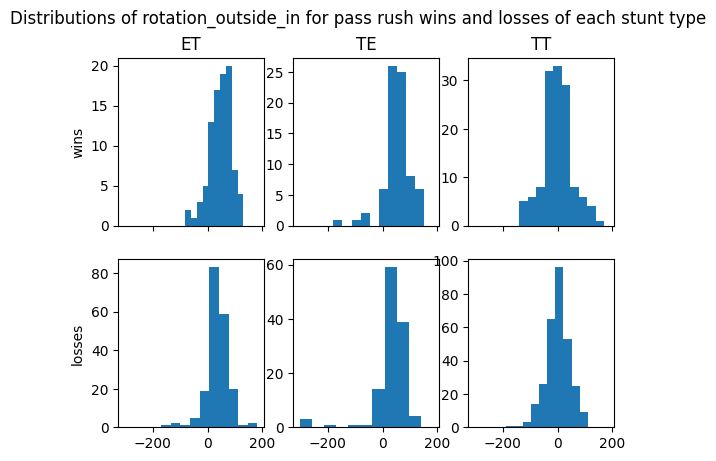

In [103]:
hist_plots(var)

In [104]:
for stunt_type in ['ET','TE','TT']:
    equal_var = True
    print('Results for stunt type {} on variable {}:'.format(stunt_type, var))
    if stunt_type in ('TE','TT'):
        equal_var = False
    print(stats.ttest_ind(losses0[losses0['stunt_type'] == stunt_type][var], 
                          wins0[wins0['stunt_type'] == stunt_type][var],
                         equal_var = equal_var))

Results for stunt type ET on variable rotation_outside_in:
Ttest_indResult(statistic=-2.3570877239191037, pvalue=0.019102469059137126)
Results for stunt type TE on variable rotation_outside_in:
Ttest_indResult(statistic=-2.3756615840924145, pvalue=0.01854519090775288)
Results for stunt type TT on variable rotation_outside_in:
Ttest_indResult(statistic=0.24231208294114967, pvalue=0.8087714807202596)


Significant difference in the inside ol's rotation between wins and losses for ET and TE stunts (usually the OG) in both cases.

In [105]:
var = 'rotation_outside_out'
wins0.groupby('stunt_type')[var].describe(), losses0.groupby('stunt_type')[var].describe()

(            count       mean        std     min     25%    50%      75%  \
 stunt_type                                                                
 ET           91.0 -16.015275  62.342902 -169.86 -41.170 -17.80   1.1950   
 TE           75.0   1.216267  43.064399  -97.45 -21.335  -3.21  27.9250   
 TT          132.0 -30.935152  40.260375 -153.89 -50.375 -25.85  -7.5875   
 
                max  
 stunt_type          
 ET          333.99  
 TE          146.18  
 TT           88.16  ,
             count       mean        std     min      25%    50%      75%  \
 stunt_type                                                                 
 EE            1.0 -60.180000        NaN  -60.18 -60.1800 -60.18 -60.1800   
 ET          193.0  -7.899896  26.812821 -112.69 -21.2700  -7.41   8.5500   
 TE          122.0   2.714426  34.020394 -122.04 -14.0575   6.52  27.0575   
 TT          293.0 -17.571843  40.672012 -223.86 -35.8100 -17.26   0.7800   
 
                max  
 stunt_type          

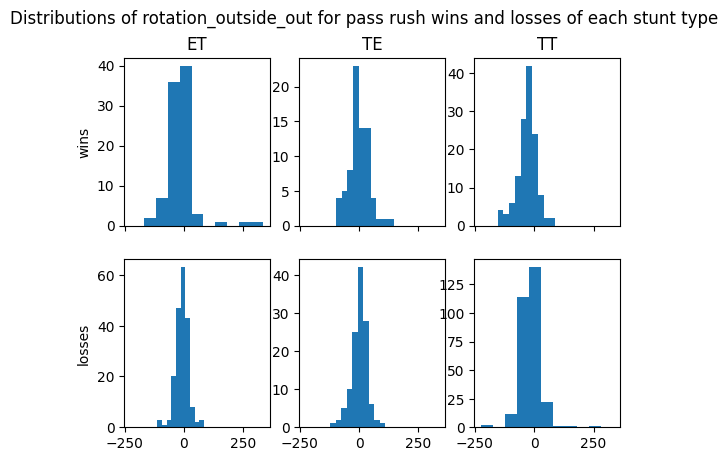

In [106]:
hist_plots(var)

In [107]:
for stunt_type in ['ET','TE','TT']:
    equal_var = True
    print('Results for stunt type {} on variable {}:'.format(stunt_type, var))
    if stunt_type in ('TE','ET'):
        equal_var = False
    print(stats.ttest_ind(losses0[losses0['stunt_type'] == stunt_type][var], 
                          wins0[wins0['stunt_type'] == stunt_type][var],
                         equal_var = equal_var))

Results for stunt type ET on variable rotation_outside_out:
Ttest_indResult(statistic=1.1909254570901202, pvalue=0.23634272938876033)
Results for stunt type TE on variable rotation_outside_out:
Ttest_indResult(statistic=0.256127412608496, pvalue=0.7982573933777393)
Results for stunt type TT on variable rotation_outside_out:
Ttest_indResult(statistic=3.14414990352394, pvalue=0.0017831017666844202)


Significant difference in the outside ol's rotation between wins and losses for TT stunts (usually the OG).